In [1]:
#Simple Data processing
import numpy as np #linear algebra
import pandas as pd # data processing, .csv load
import os

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools #For Confusion Matrix
%matplotlib inline
import seaborn as sns

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Scaling
from sklearn import preprocessing #For data normalization

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # For parameterization and splitting data
from sklearn.metrics import confusion_matrix
from sklearn import metrics # For Accuracy

#Classification Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

In [2]:
cancer=pd.read_csv('D:\Research Methods\Dataset\Breast_cancer_data.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
cancer.columns.unique

<bound method Index.unique of Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')>

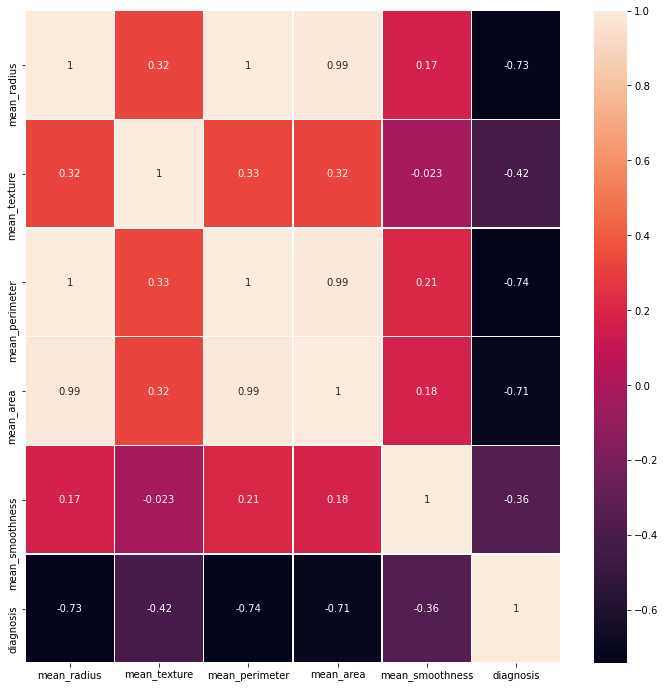

In [6]:
x, ax=plt.subplots(figsize=(12,12))
sns.heatmap(cancer.corr(),annot=True, linewidths=0.5, ax=ax)
plt.show()

In [7]:
cancer_corr = cancer.corr() 
corr_target = abs(cancer_corr["diagnosis"])
relevant_features = corr_target[corr_target>0.5]
relevant_features

mean_radius       0.730029
mean_perimeter    0.742636
mean_area         0.708984
diagnosis         1.000000
Name: diagnosis, dtype: float64

In [8]:
X_feat=cancer[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']]
y_feat=cancer['diagnosis']
X_feat

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [9]:
#Feature Selection
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X_feat,y_feat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_feat.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Assembly','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

          Assembly       Score
2   mean_perimeter  697.235272
0      mean_radius  646.981021
3        mean_area  573.060747
1     mean_texture  118.096059
4  mean_smoothness   83.651123


In [10]:
train_accuracy= []
accuracy_list = []
algorithm = []

X_train,X_test,y_train,y_test = train_test_split(cancer[['mean_perimeter','mean_radius','mean_area']]
                                                 ,cancer['diagnosis'],test_size=0.2, random_state=0)
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (455, 3)
Y_train shape : (455,)
X_test shape : (114, 3)
Y_test shape : (114,)


In [11]:
scaler_ss=preprocessing.StandardScaler()
X_train_scaled=scaler_ss.fit_transform(X_train)
X_test_scaled=scaler_ss.transform(X_test)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.BuGn):

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Train Accuracy 0.870
Test Accuracy0.886
[[43  4]
 [ 9 58]]
88.59649122807018


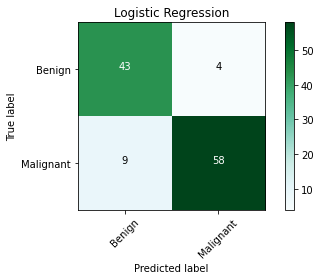

In [19]:
#Logisitc Regression

Log_Reg=LogisticRegression(C=1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Log_Reg.fit(X_train_scaled, y_train)
y_reg=Log_Reg.predict(X_test_scaled)
print("Train Accuracy {0:.3f}".format(Log_Reg.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_reg)))
cm = metrics.confusion_matrix(y_test, y_reg)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          title='Logistic Regression')
accuracy_list.append(metrics.accuracy_score(y_test, y_reg)*100)
train_accuracy.append(Log_Reg.score(X_train_scaled, y_train))
algorithm.append('Logistic Regression')

The best parameters are  {'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 0}
Train Accuracy 0.884
Test Accuracy0.904
[[37 10]
 [ 1 66]]


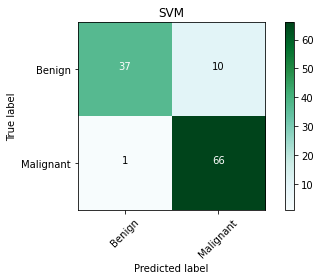

In [14]:
#Support Vector

SVC_param={'kernel':['sigmoid','rbf','poly'],'C':[1],'decision_function_shape':['ovr'],'random_state':[0]}
SVC_pol=SVC()
SVC_parm=GridSearchCV(SVC_pol, SVC_param, cv=5)
SVC_parm.fit(X_train_scaled, y_train)
y_pol=SVC_parm.predict(X_test_scaled)
print("The best parameters are ",SVC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(SVC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_pol)))
cm = metrics.confusion_matrix(y_test, y_pol)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          title='SVM')
train_accuracy.append(SVC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_pol)*100)
algorithm.append('SVM')

In [15]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    K_NN =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=i, p=2,
                     weights='distance')
    K_NN.fit(X_train_scaled, y_train)
    pred_i = K_NN.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

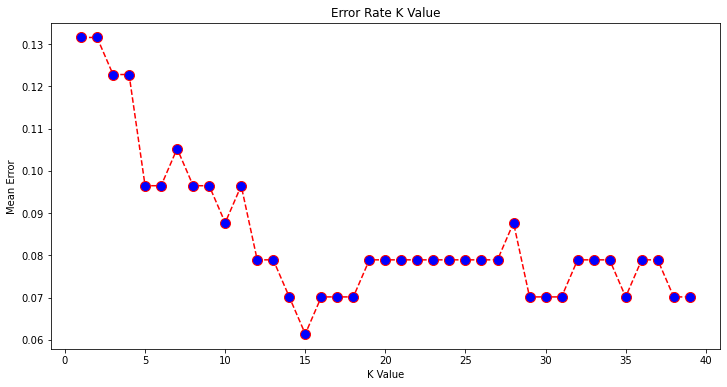

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Train Accuracy 1.000
Test Accuracy0.939
[[42  5]
 [ 2 65]]


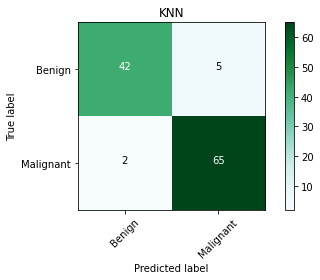

In [17]:
K_NN =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
K_NN.fit(X_train_scaled, y_train)
y_KNN=K_NN.predict(X_test_scaled)
print("Train Accuracy {0:.3f}".format(K_NN.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_KNN)))
cm = metrics.confusion_matrix(y_test, y_KNN)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          title='KNN')
train_accuracy.append(K_NN.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_KNN)*100)
algorithm.append('KNN')

The best parameters are  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'n_estimators': 50, 'random_state': None}
Train Accuracy 0.899
Test Accuracy0.930
[[40  7]
 [ 1 66]]


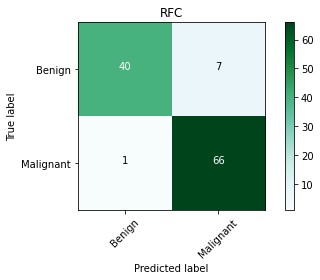

In [18]:
#Random Forest
RFC_param={'max_depth':[1,2,3,4,5],'n_estimators':[10,25,50,100,150],'random_state':[None],'criterion':['entropy','gini'],'max_features':[0.5]}
RFC=RandomForestClassifier()
RFC_parm=GridSearchCV(RFC, RFC_param, cv=5)
RFC_parm.fit(X_train_scaled, y_train)
y_RFC=RFC_parm.predict(X_test_scaled)
print("The best parameters are ",RFC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(RFC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_RFC)))
cm = metrics.confusion_matrix(y_test, y_RFC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          title='RFC')
train_accuracy.append(RFC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_RFC)*100)
algorithm.append('Random Forest')

The best parameters are  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': None, 'n_estimators': 10, 'random_state': None}
Train Accuracy 91.648
Test Accuracy89.474
[[38  9]
 [ 3 64]]


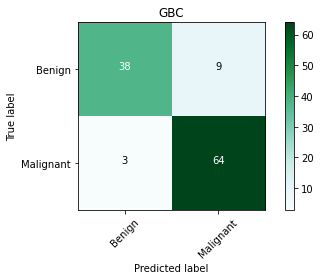

In [20]:
#GradientBoostingClassifier
GBC_parma={'loss':['deviance','exponential'],'n_estimators':[10,25,50,100,150],'learning_rate':[0.1,0.25, 0.5, 0.75],
          'criterion':['friedman_mse'], 'max_features':[None],'max_depth':[1,2,3,4,5,10],'random_state':[None]}
GBC = GradientBoostingClassifier()
GBC_parm=GridSearchCV(GBC, GBC_parma, cv=5)
GBC_parm.fit(X_train_scaled, y_train)
y_GBC=GBC_parm.predict(X_test_scaled)
print("The best parameters are ",GBC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(GBC_parm.score(X_train_scaled, y_train)*100))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_GBC)*100))
cm = metrics.confusion_matrix(y_test, y_GBC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          title='GBC')
train_accuracy.append(GBC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_GBC)*100)
algorithm.append('GBC')

The best parameters are  {'alpha': 1.5, 'normalize': False, 'solver': 'svd'}
Train Accuracy 0.888
Test Accuracy0.895
[[38  9]
 [ 3 64]]


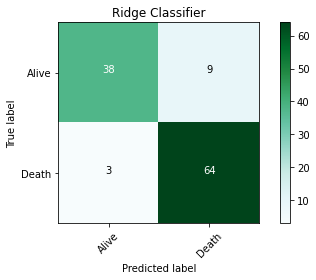

In [20]:
#Ridge
RC_parma={'solver':['svd','lsqr','cholesky'],'alpha':[0,0.5,0.75,1,1.5,2],'normalize':[True,False]}
RC=RidgeClassifier()
RC_parm=GridSearchCV(RC, RC_parma, cv=5)
RC_parm.fit(X_train_scaled, y_train)
y_RC=RC_parm.predict(X_test_scaled)
print("The best parameters are ",RC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(RC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_RC)))
cm = metrics.confusion_matrix(y_test, y_RC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='Ridge Classifier')
train_accuracy.append(RC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_RC)*100)
algorithm.append('Ridge Classifier')

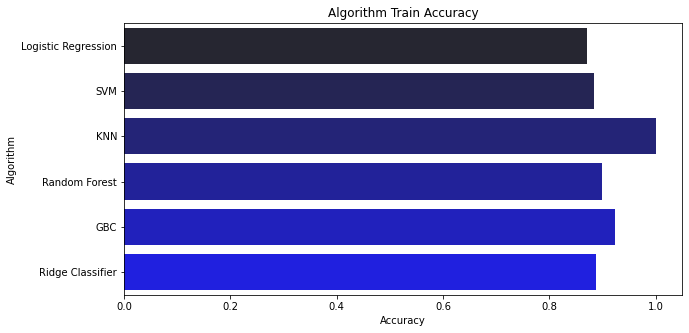

In [21]:
#Train Accuracy
f,ax = plt.subplots(figsize = (10,5))
sns.barplot(x=train_accuracy,y=algorithm,palette = sns.dark_palette("blue",len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.title('Algorithm Train Accuracy')
plt.show()

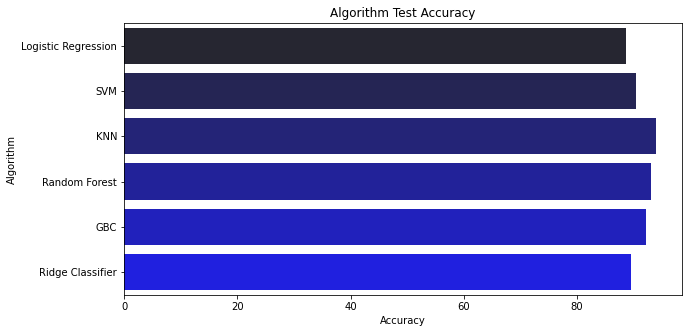

In [22]:
#Testing Accuracy
f,ax = plt.subplots(figsize = (10,5))
sns.barplot(x=accuracy_list,y=algorithm,palette = sns.dark_palette("blue",len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.title('Algorithm Test Accuracy')
plt.show()